### 4

dppc.png

![](dppc.png)

b_64.png

![](b_64.png)

### 5

In [1]:
!cat b.top

; topology for 1 alm molecule, 128 popc lipids, water and 1 counter ion
; alm.itp can be made in a straightforward manner with pdb2gmx, starting
; with a pdb file of alamethicin.
; make sure lipid.itp, popc.itp and alm.itp are in a location where
; grompp can find them (GMXLIB, current directory, or directory given in 
; the .mdp file with the include option. 
#include "ffgmx.itp"
#include "lipid.itp"
#include "dppc.itp"

#ifdef FLEX_SPC
#include "flexspc.itp"
#else
#include "spc.itp"
#endif

[ system ]
; name
bilayer in water

[ molecules ]
; name	number
DPPC    64
SOL              2618


### 6

`editconf -f b_64.gro -o b_ec -d 0.5 `

In [2]:
!ls b_ec.gro

b_ec.gro


### 7

`grompp -f em -c b_ec -p b -o b_em -maxwarn 2
mdrun -deffnm b_em -v`

Fmax_start = $4.3*10^5$  
Fmax_min = $6.1*10^2$

![](optimization_steps.png)

### 8

`genbox -cp b_em -p b -cs spc216 -o b_s`

### 9

`grompp -f pr -c b_s -p b -o b_pr -maxwarn 1
mdrun -deffnm b_pr -v`

![](blow.png)

не похоже что взрыв системы случился, но на всякий случай

`grompp -f em -c b_s -p b -o b_empr -maxwarn 1
mdrun -deffnm b_empr -v`

`grompp -f pr -c b_empr -p b -o b_pr -maxwarn 1
mdrun -deffnm b_pr -v`

### 10

b_s.png

![](b_s.png)

b_pr.png

![](b_pr.png)

В b_s изменилась геометрия молекул (из-за оптимизации на шаге 7), добавилась вода  
В b_pr также произошла "утряска" молекул воды, конфигурация изменилась не очень существенно, но из такого состояния система "сойдётся" быстрее

In [5]:
# !trjconv -f b_md.xtc -s b_pr -o b_pbc_1.pdb -skip 20 

                         :-)  G  R  O  M  A  C  S  (-:

                          GROtesk MACabre and Sinister

                            :-)  VERSION 4.5.5  (-:

        Written by Emile Apol, Rossen Apostolov, Herman J.C. Berendsen,
      Aldert van Buuren, Pär Bjelkmar, Rudi van Drunen, Anton Feenstra, 
        Gerrit Groenhof, Peter Kasson, Per Larsson, Pieter Meulenhoff, 
           Teemu Murtola, Szilard Pall, Sander Pronk, Roland Schulz, 
                Michael Shirts, Alfons Sijbers, Peter Tieleman,

               Berk Hess, David van der Spoel, and Erik Lindahl.

       Copyright (c) 1991-2000, University of Groningen, The Netherlands.
            Copyright (c) 2001-2010, The GROMACS development team at
        Uppsala University & The Royal Institute of Technology, Sweden.
            check out http://www.gromacs.org for more information.

         This program is free software; you can redistribute it and/or
          modify it under the terms of the GNU General Public L

На ~30 фрейме бислой чётко выделяется (на самом деле структурированность начинает выделятся гораздо раньше, просто на 30 всё выглядит более упорядоченным)

![](frame30.png)

In [13]:
cat b_pbc_1.pdb | grep -B 3 -i -w "MODEL       30"

TITLE     bilayer in water t= 14500.00000
REMARK    THIS IS A SIMULATION BOX
CRYST1   78.493   55.710   36.484  90.00  90.00  90.00 P 1           1
MODEL       30


t=14500

In [15]:
#  !g_traj -f b_md.xtc -s b_pr -ob box_1.xvg

                         :-)  G  R  O  M  A  C  S  (-:

                   Great Red Oystrich Makes All Chemists Sane

                            :-)  VERSION 4.5.5  (-:

        Written by Emile Apol, Rossen Apostolov, Herman J.C. Berendsen,
      Aldert van Buuren, Pär Bjelkmar, Rudi van Drunen, Anton Feenstra, 
        Gerrit Groenhof, Peter Kasson, Per Larsson, Pieter Meulenhoff, 
           Teemu Murtola, Szilard Pall, Sander Pronk, Roland Schulz, 
                Michael Shirts, Alfons Sijbers, Peter Tieleman,

               Berk Hess, David van der Spoel, and Erik Lindahl.

       Copyright (c) 1991-2000, University of Groningen, The Netherlands.
            Copyright (c) 2001-2010, The GROMACS development team at
        Uppsala University & The Royal Institute of Technology, Sweden.
            check out http://www.gromacs.org for more information.

         This program is free software; you can redistribute it and/or
          modify it under the terms of the GNU General P

In [49]:
"""
# This file was created Wed Feb  3 18:14:17 2021
# by the following command:
# g_order -s b_pr -f b_md.xtc -o ord_end.xvg -n sn1.ndx -b 45000 -d z
#
# g_order is part of G R O M A C S:
#
# Good gRace! Old Maple Actually Chews Slate
#
@    title "Order tensor diagonal elements"
@    xaxis  label "Atom"
@    yaxis  label "S"
""".count('\n')

12

In [17]:
import pandas as pd

In [25]:
box_sizes = pd.read_csv('box_1.xvg', sep='\t', header=None, names=['time', 'x', 'y', 'z', '1', '2', '3'], skiprows=list(range(24)))

Ось z перпендикулярна бислою (размерность по этой оси уменьшается в процессе сборки слоя)

In [30]:
from matplotlib import pyplot as plt

Площадь слоя растёт

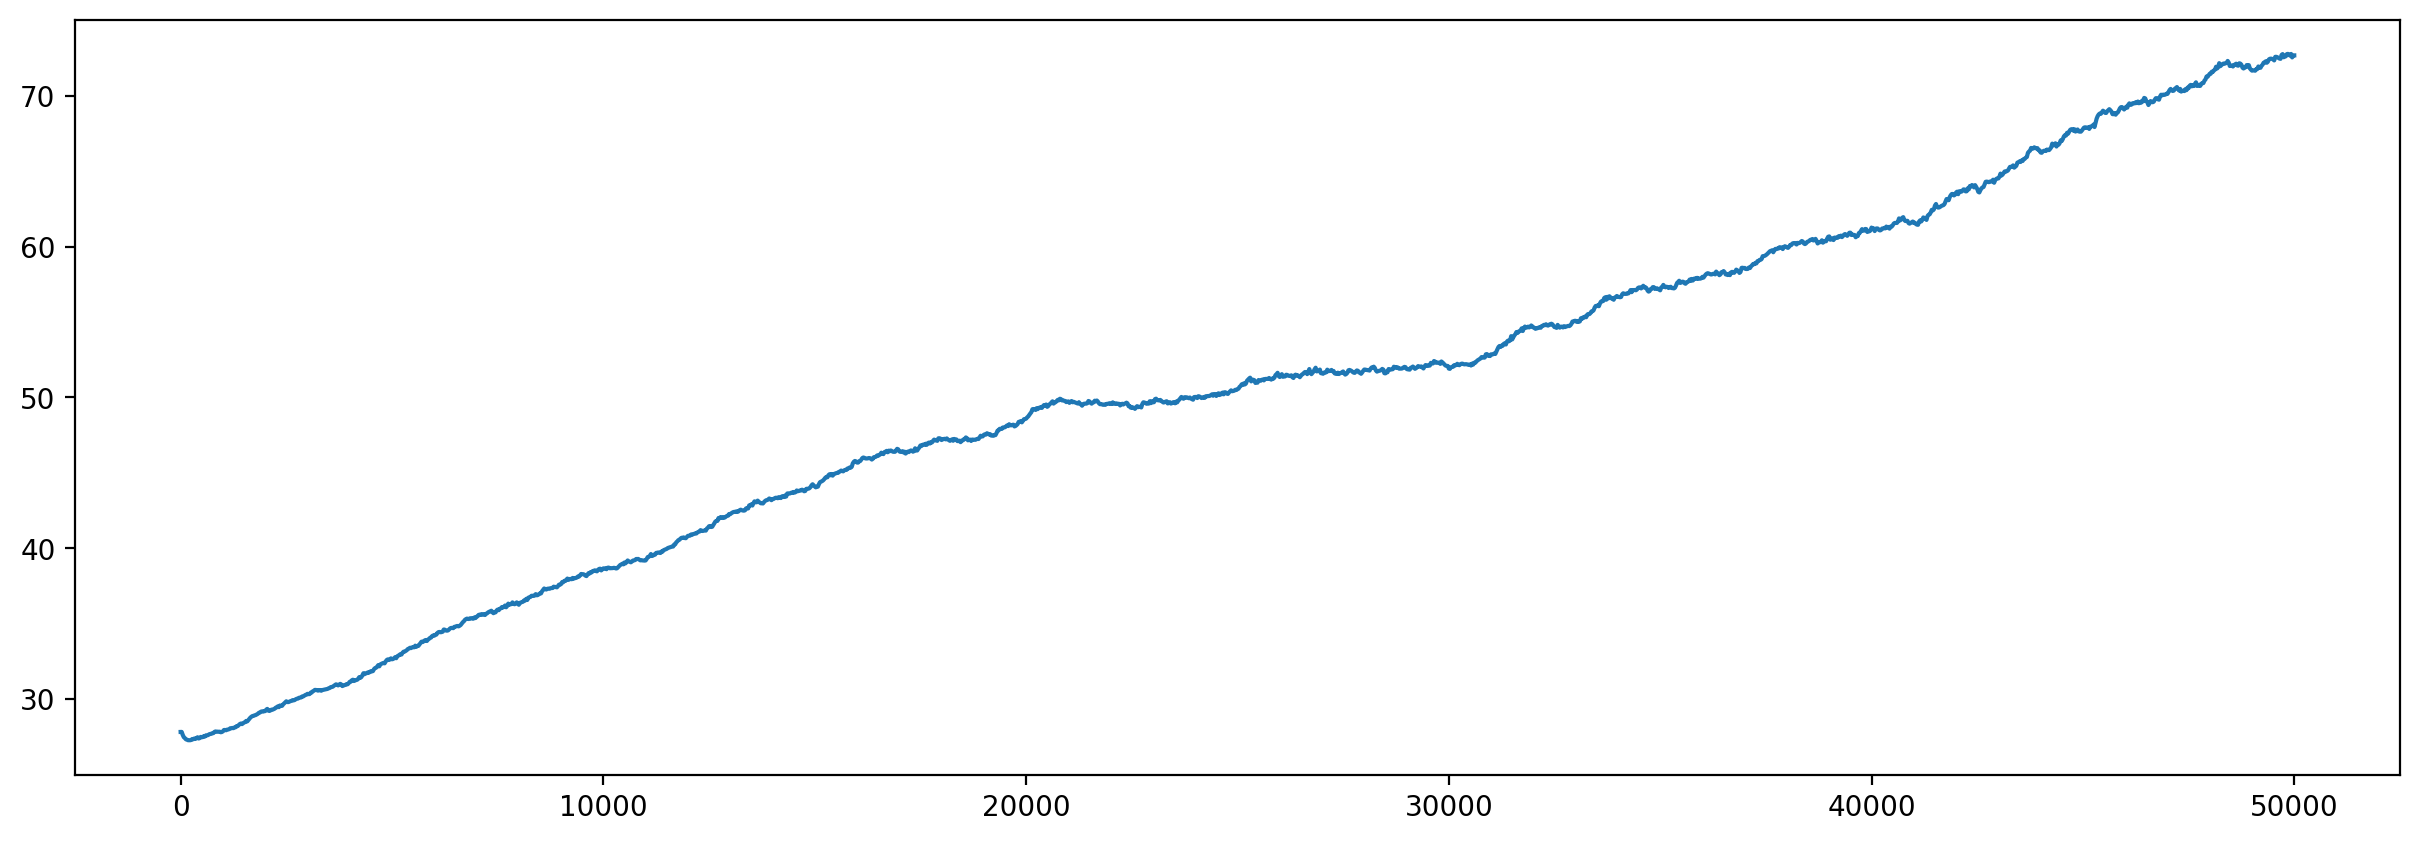

In [39]:
_, ax = plt.subplots(dpi=200, figsize=(15, 5))
ax.plot(box_sizes['time'], box_sizes['x'] * box_sizes['y'])

In [45]:
hydro_sizes = pd.read_csv(
    'sas_b.xvg',
    sep=' +',
    header=None,
    names=['time', 'phobic', 'philic', 'total', 'D Gsolv'],
    skiprows=list(range(23))
)

/home/shad/miniconda3/envs/py37-hse/lib/python3.7/site-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


Сильно снижается количество гифдрофобных контактов, но снижается и количество гидрофильных (что не очень понятно как объяснить), гифдрофобные хвосты липидов теряют контакты с водой, и остаются "внутри" относительно гидрофильных головных частей липидов

Text(0.5, 1.0, 'philic')

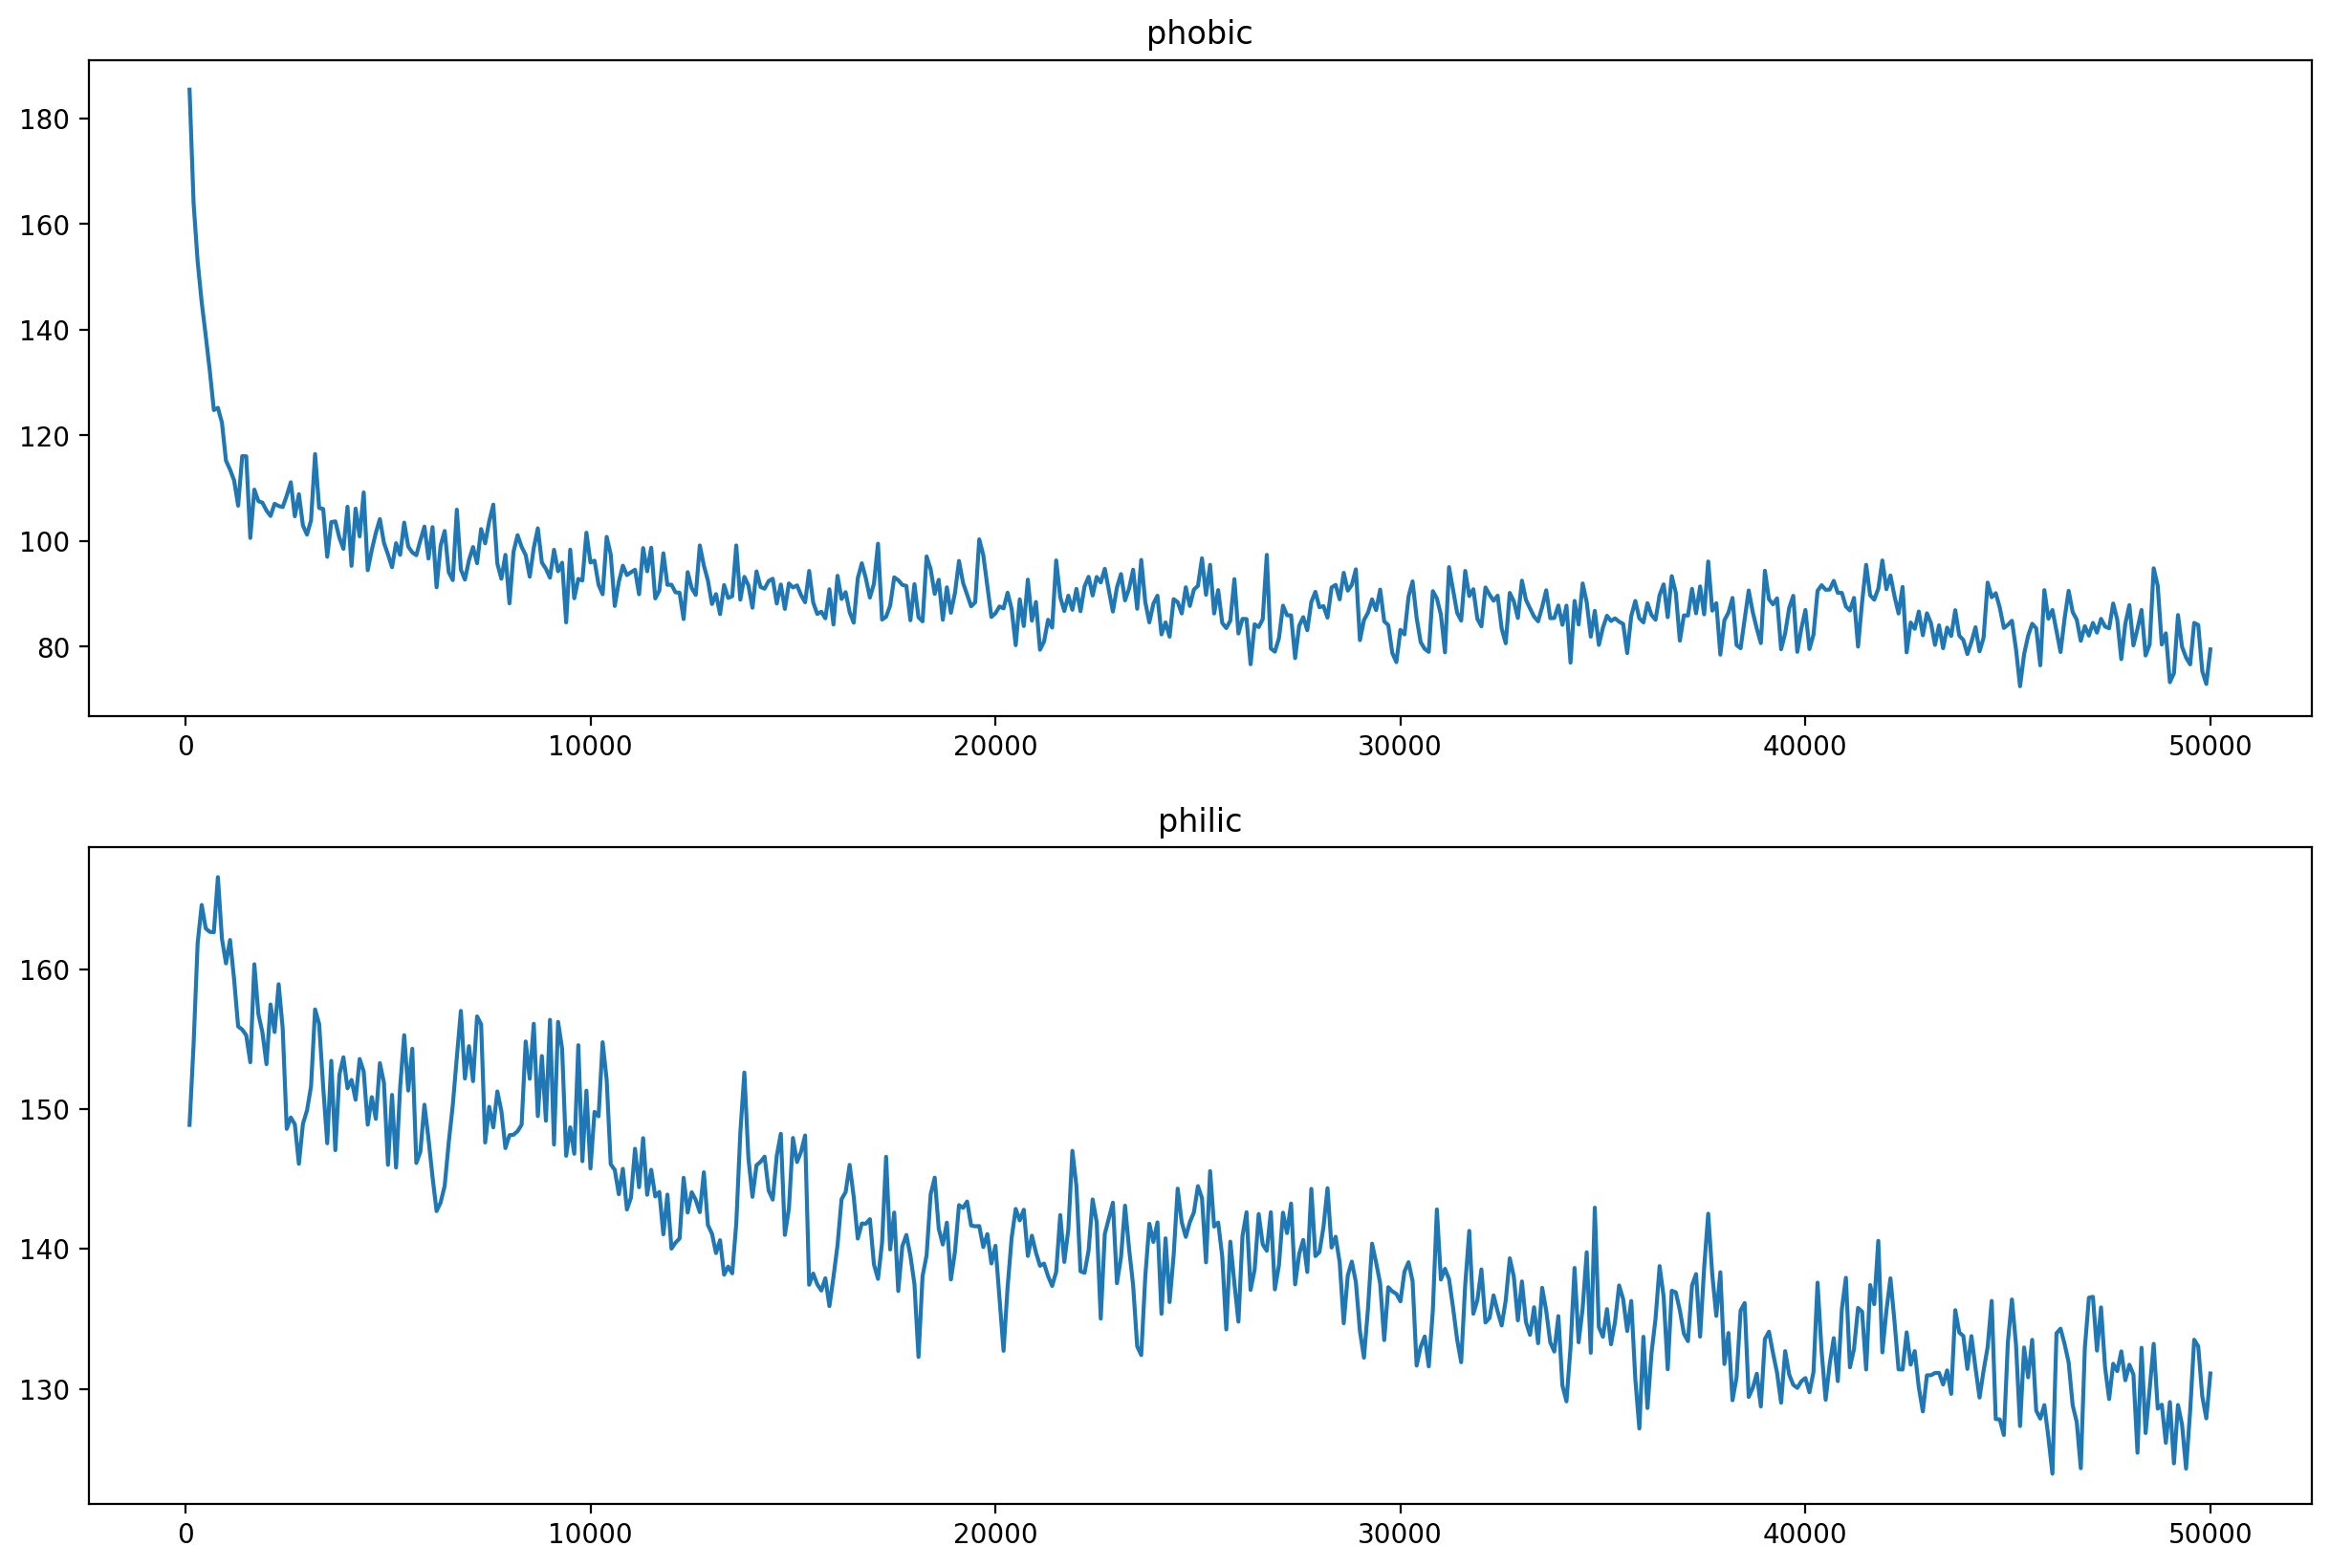

In [47]:
_, axes = plt.subplots(ncols=1, nrows=2, figsize=(15, 10), dpi=200)
axes[0].plot(hydro_sizes['time'], hydro_sizes['phobic'])
axes[0].set_title('phobic')
axes[1].plot(hydro_sizes['time'], hydro_sizes['philic'])
axes[1].set_title('philic')

In [48]:
!wget http://kodomo.cmm.msu.ru/~golovin/bilayer/sn1.ndx

--2021-02-03 18:10:25--  http://kodomo.cmm.msu.ru/~golovin/bilayer/sn1.ndx
Resolving kodomo.cmm.msu.ru (kodomo.cmm.msu.ru)... 93.180.63.127
Connecting to kodomo.cmm.msu.ru (kodomo.cmm.msu.ru)|93.180.63.127|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://kodomo.fbb.msu.ru/~golovin/bilayer/sn1.ndx [following]
--2021-02-03 18:10:25--  https://kodomo.fbb.msu.ru/~golovin/bilayer/sn1.ndx
Resolving kodomo.fbb.msu.ru (kodomo.fbb.msu.ru)... 93.180.63.127
Connecting to kodomo.fbb.msu.ru (kodomo.fbb.msu.ru)|93.180.63.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5328 (5.2K)
Saving to: `sn1.ndx'

100%[======================================>] 5,328       --.-K/s   in 0s      

2021-02-03 18:10:25 (19.4 MB/s) - `sn1.ndx' saved [5328/5328]



`g_order -s b_pr -f b_md.xtc -o ord_end.xvg -n sn1.ndx -b 45000 -d z
g_order -s b_pr -f b_md.xtc -o ord_start.xvg -n sn1.ndx -e 5000 -d z
`

In [52]:
org_end = pd.read_csv(
    'ord_end.xvg', sep=' +', engine='python', skiprows=list(range(12)), header=None, names=['atom', 's1', 's2', 's3']
)
org_start = pd.read_csv(
    'ord_start.xvg', sep=' +', engine='python', skiprows=list(range(12)), header=None, names=['atom', 's1', 's2', 's3']
)

In [55]:
org_end

,atom,s1,s2,s3
0,1,0.072012,0.093468,-0.165480
1,2,0.095813,0.085275,-0.181087
2,3,0.100755,0.092803,-0.193557
3,4,0.112634,0.086266,-0.198900
4,5,0.113305,0.097086,-0.210391
5,6,0.124281,0.095994,-0.220275
6,7,0.119156,0.099951,-0.219107
7,8,0.120073,0.105960,-0.226033
8,9,0.118458,0.101841,-0.220298
9,10,0.124952,0.097044,-0.221996


Text(0.5, 1.0, 'end_s3')

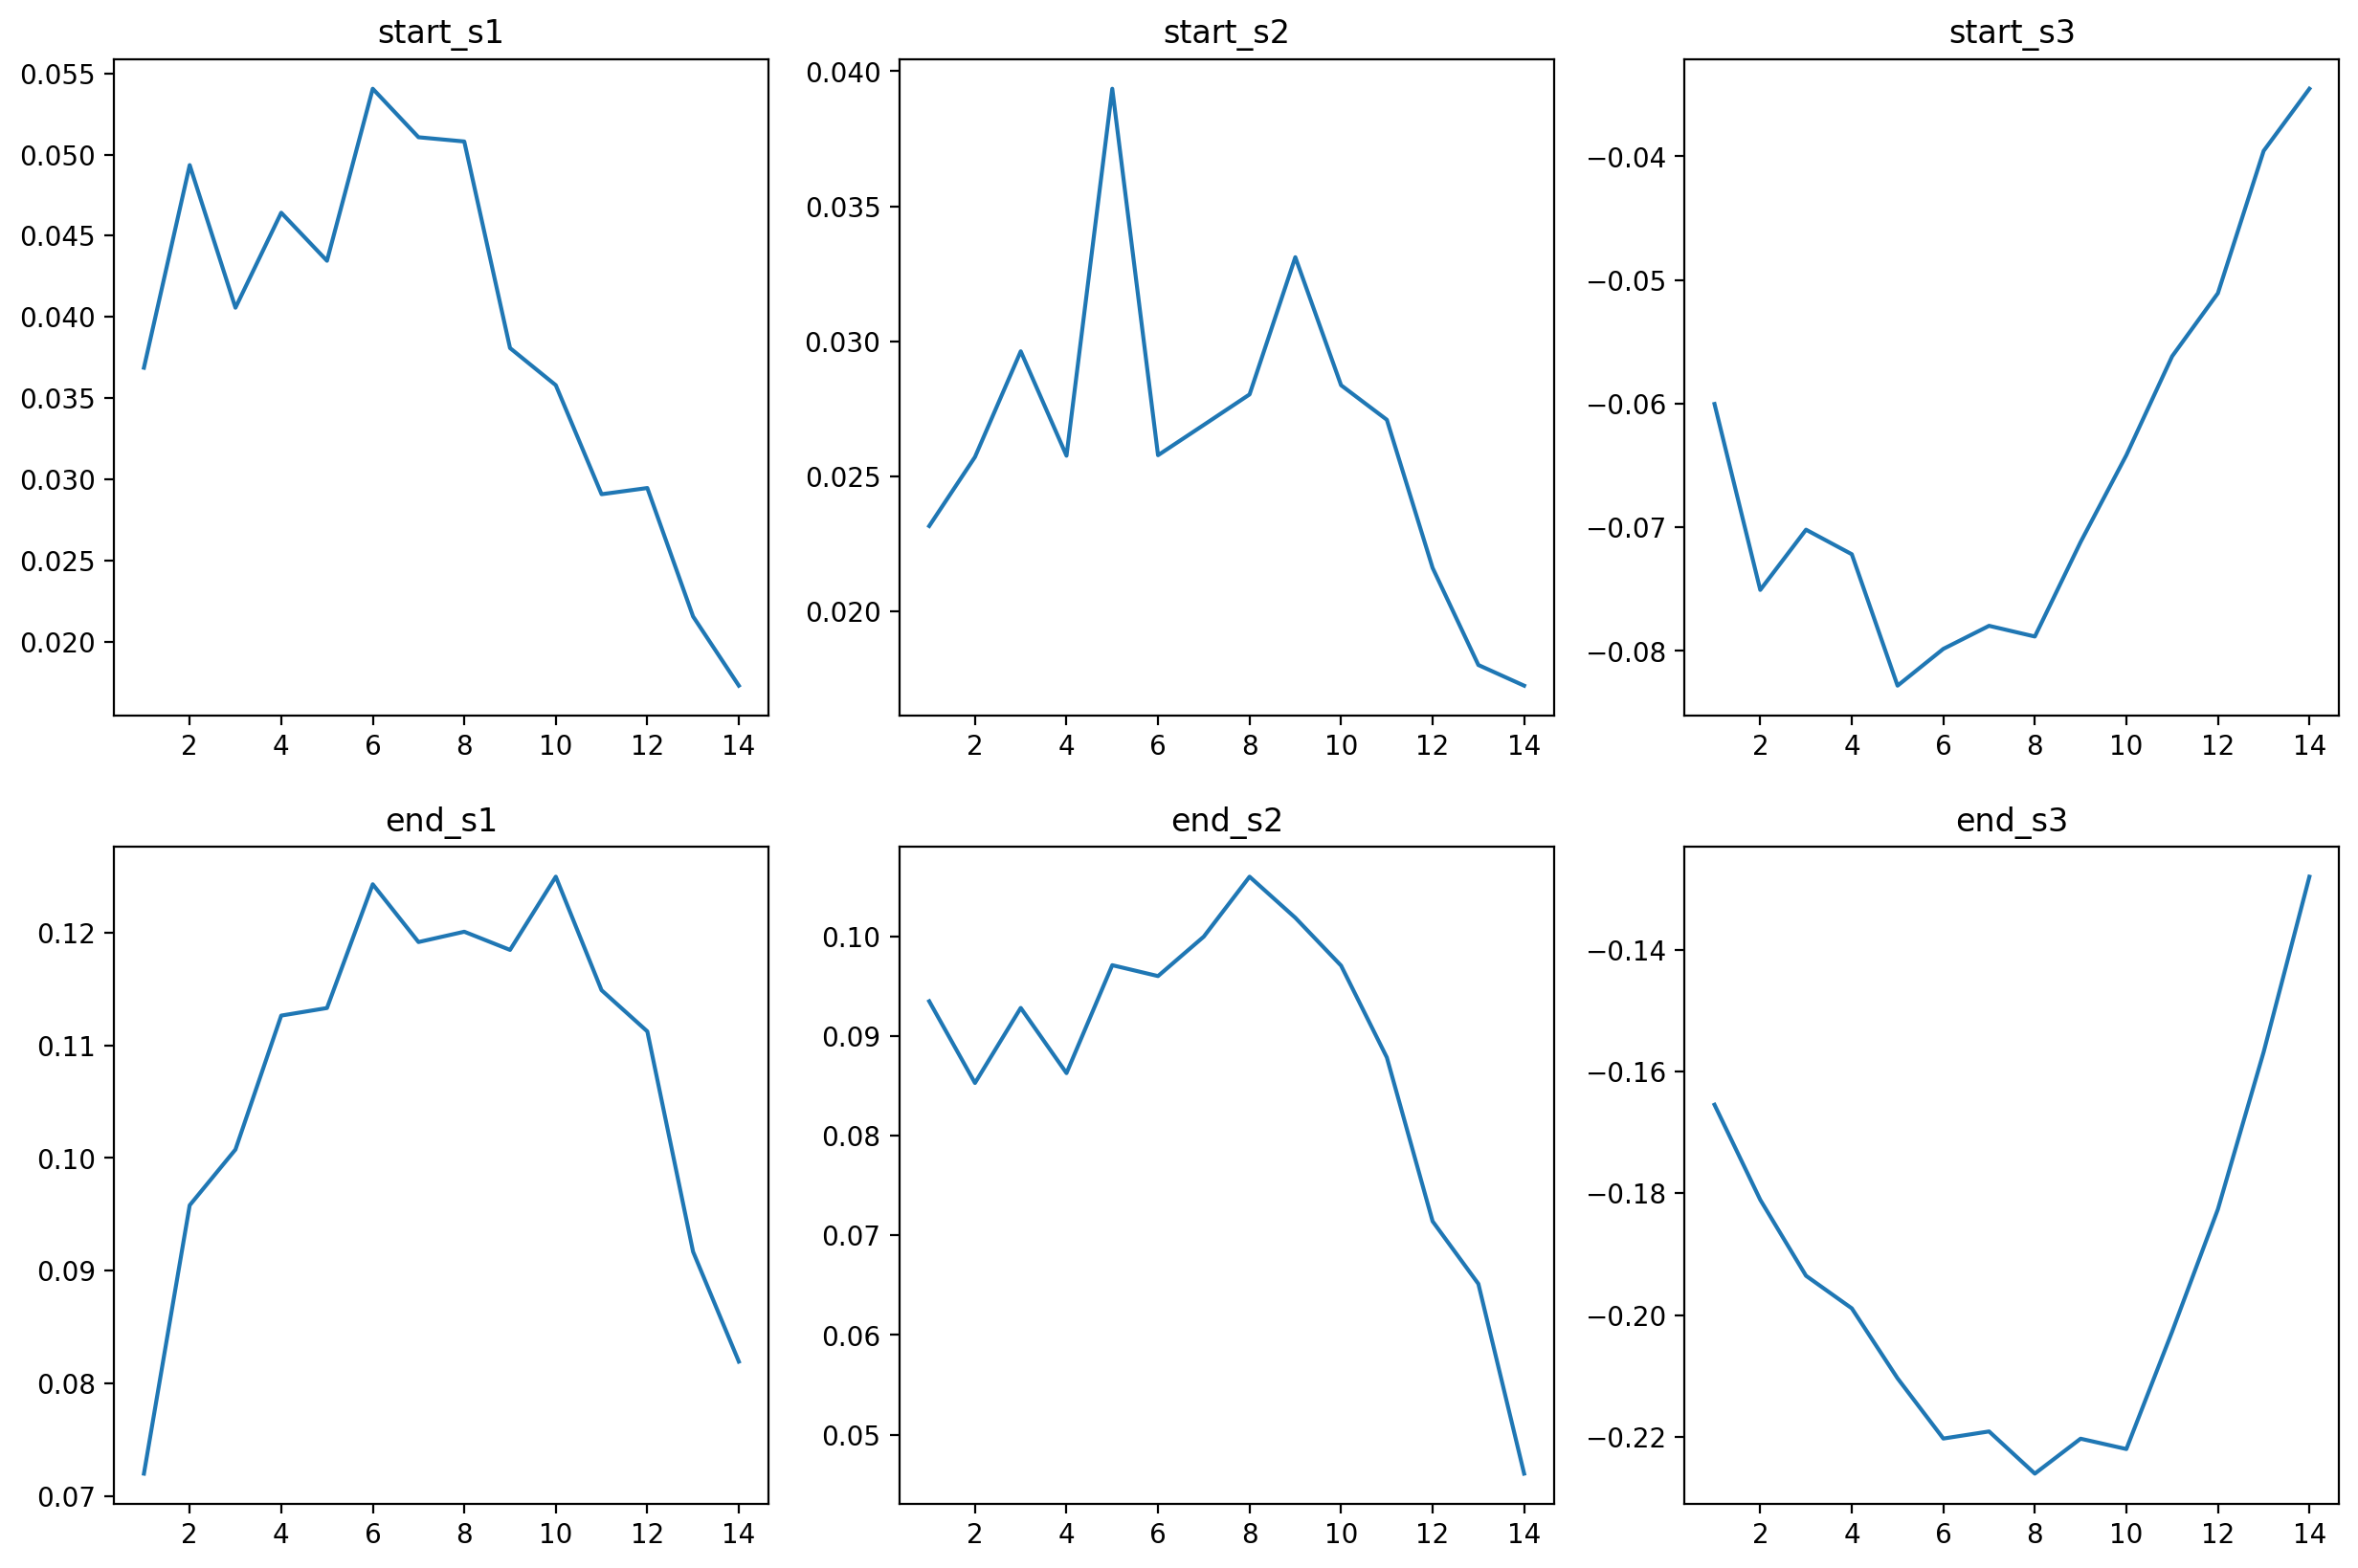

In [57]:
_, axes = plt.subplots(ncols=3, nrows=2, figsize=(15, 10), dpi=200)
axes[0, 0].plot(org_start['atom'], org_start['s1'])
axes[0, 0].set_title('start_s1')
axes[0, 1].plot(org_start['atom'], org_start['s2'])
axes[0, 1].set_title('start_s2')
axes[0, 2].plot(org_start['atom'], org_start['s3'])
axes[0, 2].set_title('start_s3')
axes[1, 0].plot(org_end['atom'], org_end['s1'])
axes[1, 0].set_title('end_s1')
axes[1, 1].plot(org_end['atom'], org_end['s2'])
axes[1, 1].set_title('end_s2')
axes[1, 2].plot(org_end['atom'], org_end['s3'])
axes[1, 2].set_title('end_s3')

Я не совсем понимаю почему мера порядки имеет 3 компоненты, но похоже что в начале и в конце поведение этой меры похоже, но в конце существенно больше её абсолютные значения